# ANALYZING TITANIC DATASET

# About the Data
The dataset has total of 891 rows and 12 columns
* Survived = Survival; 0 = No, 1 = Yes
*Pclass = Ticket class; 1 = 1st, 2 = 2nd, 3 = 3rd
* age = Age; Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5
* In [ ]: In [ ]: In [ ]: Out[ ]: In [ ]: Out[ ]: In [ ]: Out[ ]:
* SibSp = # of siblings / spouses aboard the Titanic
Sibling (brother, sister, stepbrother, stepsister)
* Spouse = husband, wife (mistresses and fiancés were ignored)
* Parch = # of parents / children aboard the Titanic
Some children travelled only with a nanny, therefore parch=0 for them
* Ticket = Ticket number
* Fare = Passenger fare
* Cabin = Cabin number
* Embarked = Port of Embarkation; C = Cherbourg, Q = Queenstown, S = Southampton

In [78]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [79]:
#Load the dataset into a Pandas DataFrame and display the first 5 rows
df = pd.read_csv('/content/Titanic-Dataset.csv')
df.tail()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
 #Calculate and print the basic statistics (mean, median, standard deviation) for numerical columns such as age and fare
 df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Exploratory Data Analysis

In [ ]:
# How many passengers survived the Titanic disaster? Print the count and percentage
numsurvived = df['Survived'].sum()
totalPassenger = len(df['PassengerId'])
perSurvived = numsurvived * 100/totalPassenger
print(numsurvived, 'people survived the titanic disaster')
print(totalPassenger)
print(perSurvived, '% of the total passenger survived the titanic')

342 people survived the titanic disaster
891
38.38383838383838 % of the tottal passenger survived the titanic


In [ ]:
#What is the average age of passengers on board? Print the result

averageAge = df['Age'].mean()
print("Average age is ", averageAge)

Average age is  29.69911764705882


In [ ]:
# How many passengers travelled in each passenger class (Pclass)? Print the count for each class.
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [ ]:
# What is the survival rate for male and female passengers separately?
# Print the survival rate for each gender

# Method 1

df.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [ ]:
# Method 2

#Split the dataframe into male and female dataframe

male_df = df[df['Sex'] == 'male']
sr_male= male_df['Survived'].mean()

female_df = df[df['Sex'] == 'female']
sr_female= female_df['Survived'].mean()

print("The survival rate is", sr_male)
print("The survival rate is", sr_female)

The survival rate is 0.18890814558058924
The survival rate is 0.7420382165605095


In [ ]:
# Identify and handle missing values in the dataset.
# Print the count of missing values for each column.

df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
# Remove unnecessary columns that are irrelevant to our analysis.
df.drop(['Name', 'Cabin'], axis=1, inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


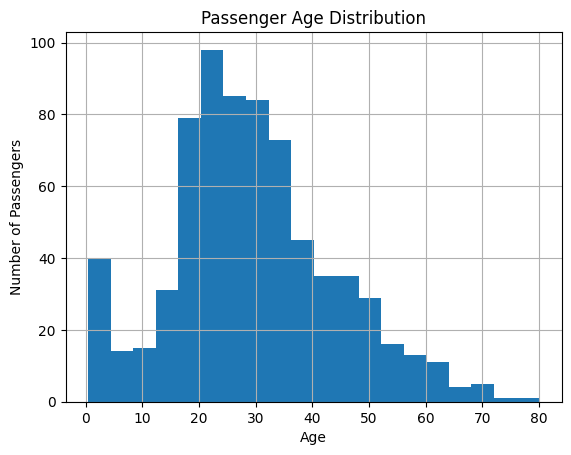

In [ ]:
# Histogram showing the distribution of passenger ages.
df['Age'].hist(bins = 20)
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.title('Passenger Age Distribution')
plt.show()

The first chart provides insight into the age distribution of the passengers. It clearly illustrates that a substantial portion of passengers falls within the age range of 18 to 40 years. This age group represents a significant proportion of the passenger population on the Titanic.


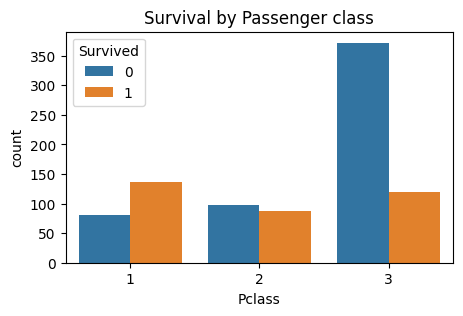

In [66]:
#Bar chart showing the survival count for each passenger class (Pclass).
plt.figure(figsize=(5,3))
plt.title('Survival by Passenger class')
sns.countplot(data=df, x='Pclass', hue ='Survived')
plt.show()


The chart unveils a stark contrast in survival rates among passengers in different classes aboard the Titanic. Notably, a higher number of passengers in the third class tragically lost their lives, while a notably lower number of fatalities were recorded among those in the first class.

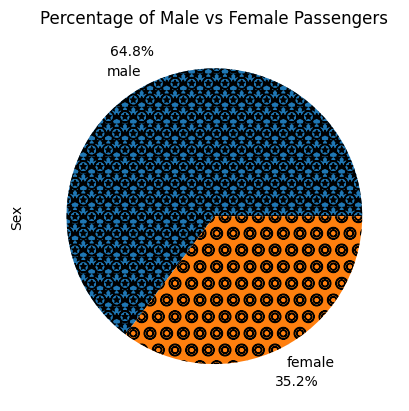

In [54]:
# Pie chart showing the percentage of male and female passengers.
df['Sex'].value_counts().plot(kind='pie', autopct='%1.1f%%', pctdistance=1.25, hatch=['**O', 'oO', 'O.O', '.||.'])
plt.title('Percentage of Male vs Female Passengers')
plt.show()



The pie chart provides a clear insight into the gender distribution of Titanic passengers. It is evident that a significantly higher percentage of the individuals who boarded the Titanic were male.

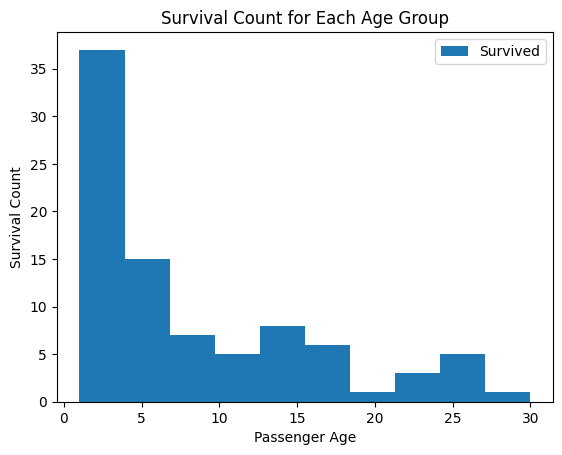

In [44]:
#Histogram showing the survival count for each age group.
df.groupby('Age')['Survived'].count().plot(kind='hist')
plt.xlabel('Passenger Age')
plt.ylabel('Survival Count')
plt.title('Survival Count for Each Age Group')
plt.legend()
plt.show()

The chart highlights a notable pattern in the Titanic's survival count, indicating that a greater number of survivors were from the younger age groups.

In [92]:
# Dataframe of Survivors by the Embarkation Point
embark = df.groupby(["Embarked", "Survived"]).size().reset_index(name="Count")
embark = pd.DataFrame(embark)
embark["Percentage"] = round(embark["Count"] * 100/len(df),2)
embark

,Embarked,Survived,Count,Percentage
0,C,0,75,8.42
1,C,1,93,10.44
2,Q,0,47,5.27
3,Q,1,30,3.37
4,S,0,427,47.92
5,S,1,217,24.35


<ipython-input-101-3323b4593819>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f"{int(x)}%" for x in vals], fontweight="semibold")


[Text(0, 0.0, '0%'),
 Text(0, 10.0, '10%'),
 Text(0, 20.0, '20%'),
 Text(0, 30.0, '30%'),
 Text(0, 40.0, '40%'),
 Text(0, 50.0, '50%'),
 Text(0, 60.0, '60%')]

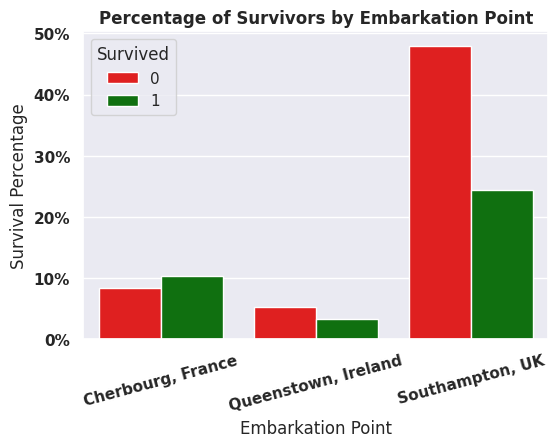

In [101]:
# Graph of Survivors by the Embarkation Point
plt.figure(figsize=(6,4))
sns.set(style="darkgrid")
colour = ["red", "green"]
ax = sns.barplot(x = "Embarked", y = "Percentage", data=embark, hue="Survived", palette=colour)

# Set Titles and Labels
ax.set_title("Percentage of Survivors by Embarkation Point", weight="semibold")
ax.set_xticklabels(["Cherbourg, France", "Queenstown, Ireland", "Southampton, UK"], rotation=15, fontweight="semibold")
ax.set_xlabel("Embarkation Point")
ax.set_ylabel("Survival Percentage")

# Format Y-axis tick labels
vals = ax.get_yticks()
ax.set_yticklabels([f"{int(x)}%" for x in vals], fontweight="semibold")


The chart clearly illustrates that a higher percentage of passengers who boarded at the 'S' (Southampton) port had a better survival rate compared to those who boarded at 'Q' (Queenstown) and 'C' (Cherbourg) ports.

<ipython-input-106-ad0823b38c7e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


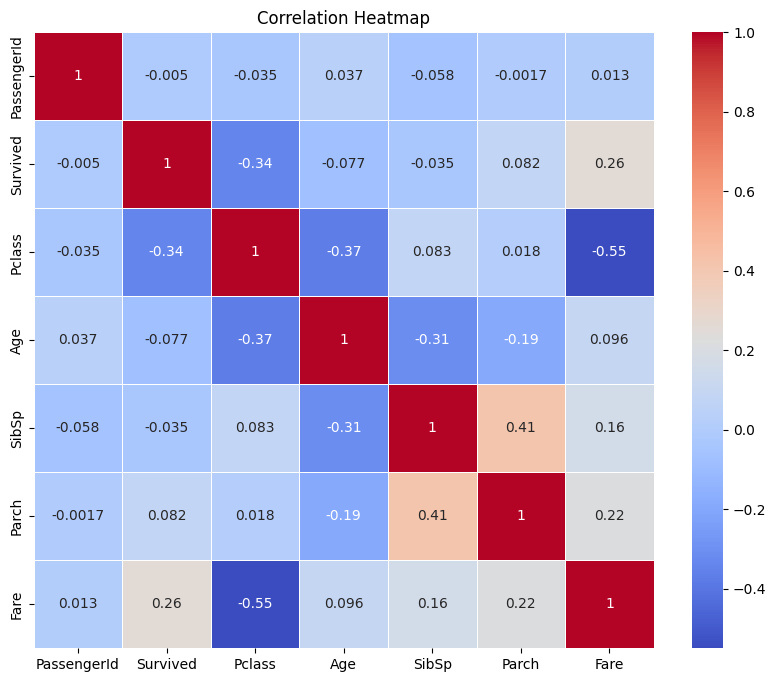

In [106]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


The correlation heatmap visualizes the relationships between different variables in our dataset. Each cell in the heatmap represents the correlation coefficient between two variables, with color intensity indicating the strength and direction of the correlation.

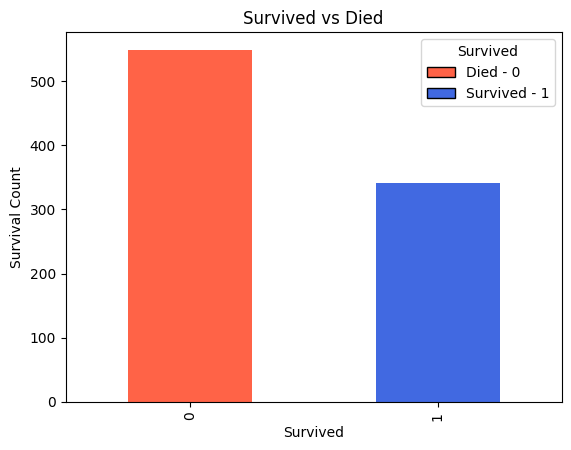

In [40]:
#How Many People Survived  and died
colors = ['tomato','royalblue']
df['Survived'].value_counts().plot(kind='bar', color=colors)
plt.ylabel('Survival Count')
plt.xlabel('Survived')
plt.title('Survived vs Died')

# Create legend handles and labels
handles = [plt.Rectangle((0, 0), 1, 1, color=colors[i], ec="k") for i in range(len(colors))]
labels = ['Died - 0', 'Survived - 1']
plt.legend(handles, labels, title='Survived')

plt.show()


The chart indicates that there was a larger number of passengers who tragically lost their lives on the Titanic compared to those who survived.

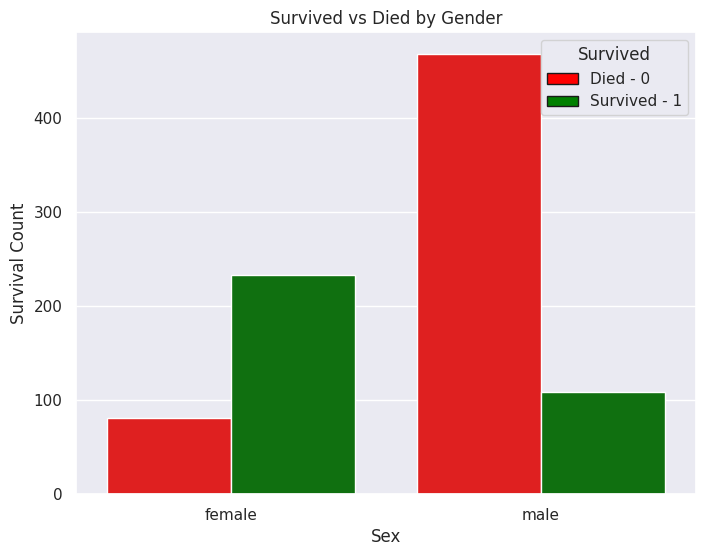

In [102]:
# Define colors
colors = ['red', 'green']

# Group by 'Sex' and 'Survived' and calculate value counts
data = df.groupby(['Sex', 'Survived']).size().reset_index(name='Count')

# Create a bar plot using Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x='Sex', y='Count', hue='Survived', data=data, palette=colors)

# Set labels and title
plt.ylabel('Survival Count')
plt.xlabel('Sex')
plt.title('Survived vs Died by Gender')

# Create legend
handles = [plt.Rectangle((0, 0), 1, 1, color=colors[i], ec="k") for i in range(len(colors))]
labels = ['Died - 0', 'Survived - 1']
plt.legend(handles, labels, title='Survived')

plt.show()


The chart reveals a significant gender-based disparity in the Titanic's outcomes. It clearly depicts that fewer fatalities were recorded among females, indicating a notably higher survival rate for women compared to males